In [1]:
# Logistic Regression from scratch
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

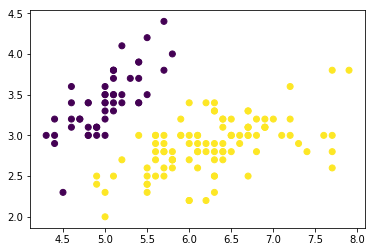

In [2]:
iris = datasets.load_iris() #iris data set

X = iris.data[:, :2] # extracts first two feature columns
y = (iris.target != 0) * 1 # convert the target's dataset into binary

#data visualization
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [23]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr #learning rate
        self.num_iter = num_iter #number of iterations
        self.fit_intercept = fit_intercept
        self.verbose = verbose #if we want to se the cost in the loop
        
    def __add_intercept(self, X):
        """appends numbers 1 in the [:, 0] position of X
            this is extra util data"""
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X) # appends numbers 1 in the [:, 0] position of X
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            # forward propagation------------------------
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            # backpropagation----------------------------
            gradient = np.dot(X.T, (h - y)) / y.size #derivate of h with respect to theta
            self.theta -= self.lr * gradient # gradient descent
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [82]:
model = LogisticRegression(lr=0.1, num_iter=300000, verbose=False)
model.fit(X, y)
%time model.fit(X, y)

CPU times: user 5.79 s, sys: 8.16 ms, total: 5.8 s
Wall time: 5.78 s


In [81]:
preds = model.predict(X, 0.5)
theta = model.theta

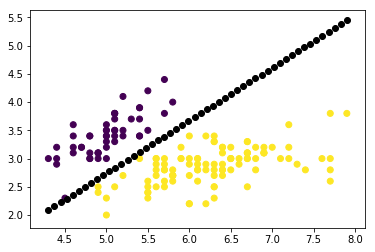

In [79]:
#data visualization
for i in np.linspace(np.amin(X[:,:1]),np.amax(X[:,:1])):
        slope = -(theta[0]/theta[2])/(theta[0]/theta[1])  
        intercept = -theta[0]/theta[2]

        #y =mx+c, m is slope and c is intercept
        y = (slope*i) + intercept
        plt.plot(i, y,'ko')
plt.scatter(X[:,0],X[:,1], c=preds)
plt.show()